In [ ]:
"""
    File : linescatterVariousEvolutionaryFeatures.ipynb
    Plot : line and scatter plots of various evolutionary features over time
    Input : 
        SourceData_Fig5e.xlsx
"""

In [1]:
path_to_all_source_data = "../Source data for figures"

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import os

In [21]:
def config_font_size(figsize):
    params = {'legend.fontsize': 6,
              'figure.figsize': figsize,
             'axes.labelsize': 8,
             'axes.titlesize': 8,
             'xtick.labelsize':6,
             'ytick.labelsize':6,
             'pdf.fonttype':42}
    plt.rcParams.update(params)
        
def scatter_line_segment(
    df, 
    feature_y,
    feature_color,
    ylim,
    cmap,
):
    norm = mpl.colors.Normalize(
        vmin=df[feature_color].min(), 
        vmax=df[feature_color].max()
    )
    mapper = cm.ScalarMappable(norm=norm, cmap=cmap)

    colors = [
        mapper.to_rgba(value)
        for value in df[feature_color]
    ]

    fig = plt.figure(dpi=300)
    ax = fig.add_axes([0.4,0.2,0.55,0.75])
    config_font_size(figsize = (1,3))
    
    ax.scatter(
        x=df[feature_color],
        y=df[feature_y],
        color=colors,
        marker='o',
        s=0.5
    )
    
    ax.set_xticks([])
    ax.set_title(feature_color, size=6)
    if ylim:
        ax.set_ylim(ylim)
    
    plt.show()
    plt.close()
    
def plot_data_1(data):
    
    feature_1 = 'MacroSubcloneNumber'
    feature_2 = 'FitnessSliceAverage'
    
    # line plot
    fig = plt.figure(dpi=300)
    ax = fig.add_axes([0.2,0.2,0.75,0.75])
    config_font_size(figsize = (2.75,3))

    for simid in data.SimID.unique().tolist():
        df_sim = data.loc[
            data.SimID == simid
        ]

        ax.plot(df_sim[feature_1], df_sim[feature_2],
            marker='o', linewidth = 0.5, markersize=1)

    ax.set_xlabel(feature_1)
    ax.set_ylabel(feature_2)
    ax.set_ylim([0.2,1])

    plt.show()
    plt.close()

def plot_data_2(data):
    
    feature_1 = 'MacroSubcloneNumber'
    feature_2 = 'FitnessSliceAverage'
    
    # scatter plot
    for feature_color, cmap in zip(
        ['SliceDiameter', 'ContourCircularity', 'DriverNumberSliceAverage'],
        [cm.Greys, cm.Oranges, cm.Greens]
    ):

        scatter_line_segment(
            data, 
            feature_color=feature_color,
            feature_y=feature_2,
            ylim=[0.2,1],
            cmap=cmap
        )
    

# Figure 5e

In [5]:
path_to_excelfile = os.path.join(
    path_to_all_source_data,
    "Source_Data_Figure_5",
    "SourceData_Fig5e.xlsx"
)

In [7]:
excelfile = pd.ExcelFile(path_to_excelfile)
excelfile.sheet_names

['SourceDataFig5e']

In [20]:
data = pd.read_excel(
    excelfile, 
    sheet_name=excelfile.sheet_names[0],
)

#### part 1 - line plot

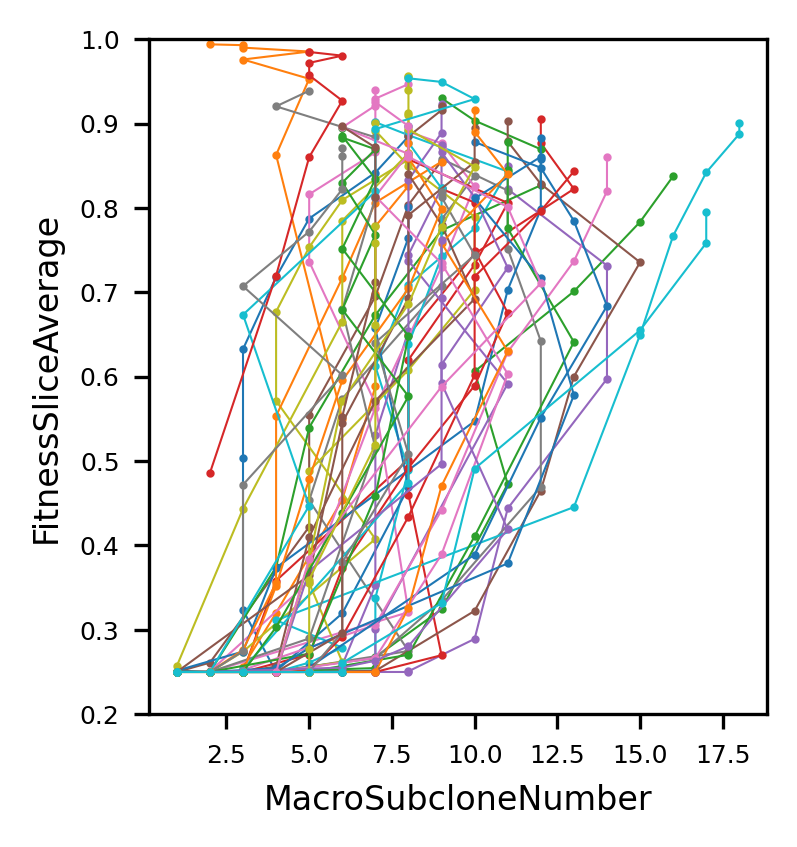

In [24]:
plot_data_1(data)

#### part 2 - scatter plots

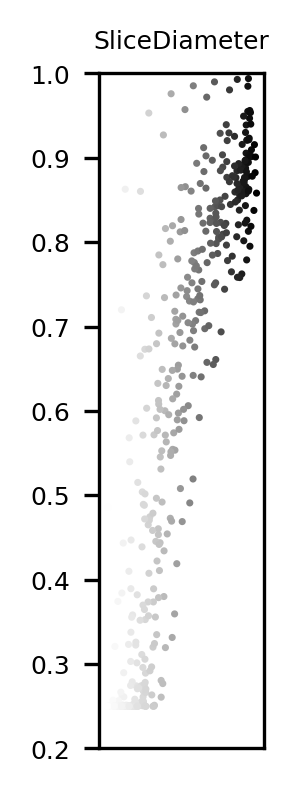

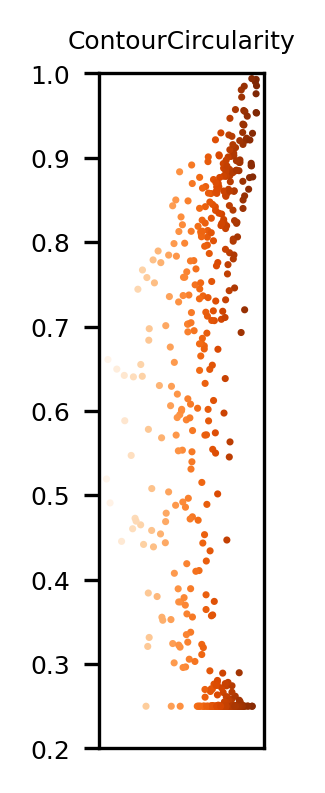

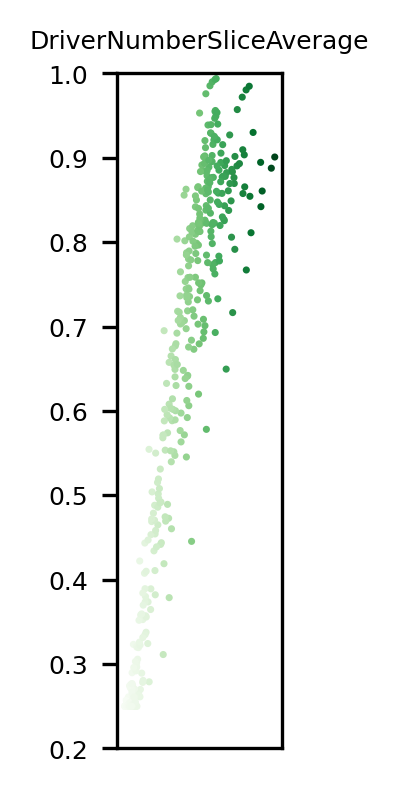

In [26]:
plot_data_2(data)